In [290]:
import mne
import numpy as np
import pyxdf
from datetime import datetime
from collections import Counter

In [97]:
filepath = 'C:\PilotData\sub-Pilooto1_ses-S001_task-Default_run-001_eeg.xdf'
data, header = pyxdf.load_xdf(filepath)

In [284]:
class XDFData:
    def __init__(self, filepath=None) -> None:
        self.rawData = None
        self.filepath = filepath
        self.data = data
        self.header = header
        self.setupData()
        self.printInfo()
        self.createMNEObjectForEEG()
    def loadXdfData(self):
        self.data, self.header = pyxdf.load_xdf(filepath)
    
    def setupData(self,):
        self.eegChannelNames = []
        self.measDate = self.header['info']['datetime'][0]
        self.markers = self.data[1]['time_series']
        self.markers.pop()
        self.markers = [marker[0] for marker in self.markers]
        self.markersTimestamps = self.data[1]['time_stamps']
        self.eegData = self.data[2]['time_series']
        self.eegSamplingFrequency = int(float(self.data[2]['info']['nominal_srate'][0]))
        self.eegTimestamps = self.data[2]['time_stamps']
        self.audioData = self.data[3]['time_series']
        self.audioTimestamps = self.data[3]['time_stamps']
        self.audioSamplingFrequency = int(float(self.data[3]['info']['nominal_srate'][0]))
        channelNames = data[2]['info']['desc'][0]['channels'][0]['channel']
        for item in channelNames:
            self.eegChannelNames.append(item['label'][0])
    
    def printInfo(self):
        print(f'No of Markers: {len(self.markers)} No .of Marker Timestamps: {self.markersTimestamps.shape[0]}')
        print(f'EEG data Shape: {self.eegData.shape} No .of eeg Timestamps: {self.eegTimestamps.shape[0]}')
        print(f'Audio data Shape: {self.audioData.shape} No .of audio Timestamps: {self.audioTimestamps.shape[0]}')
        print('EEG Channels:', self.eegChannelNames)
        print(f'Sampling Frequency ::: EEG: {self.eegSamplingFrequency}, Audio: {self.audioSamplingFrequency}')

    def createMNEObjectForEEG(self):
        meas_date = datetime.strptime(self.measDate, '%Y-%m-%dT%H:%M:%S%z')
        meas_date = (int(meas_date.timestamp()), int(meas_date.microsecond))
        info = mne.create_info(
            ch_names=self.eegChannelNames, 
            sfreq=self.eegSamplingFrequency, 
            ch_types='eeg',
        )
        info.set_meas_date(meas_date)
        self.rawEegMneData = mne.io.RawArray(self.eegData.T, info)

In [285]:
obj = XDFData()


No of Markers: 5321 No .of Marker Timestamps: 5322
EEG data Shape: (3814127, 64) No .of eeg Timestamps: 3814127
Audio data Shape: (183075840, 1) No .of audio Timestamps: 183075840
EEG Channels: ['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'EOG1', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'EOG2', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'AF8', 'AF4', 'F2', 'FCz']
Sampling Frequency ::: EEG: 1000, Audio: 48000
Creating RawArray with float64 data, n_channels=64, n_times=3814127
    Range : 0 ... 3814126 =      0.000 ...  3814.126 secs
Ready.


In [303]:
mneData = obj.rawEegMneData
markers = obj.markers
markersTimestamps = obj.markersTimestamps
markers[:5]

['SilentSyllablesPracticeStartFixation:Text_silence',
 'SilentSyllablesPracticeEndFixation:Text_silence',
 'SilentSyllablesPracticeStartStimulus:Text_silence',
 'SilentSyllablesPracticeEndStimulus:Text_silence',
 'SilentSyllablesPracticeStartISI:Text_silence']

In [313]:
markers = [marker.split(':')[0] for marker in markers]
markers[:10]

['SilentSyllablesPracticeStartFixation',
 'SilentSyllablesPracticeEndFixation',
 'SilentSyllablesPracticeStartStimulus',
 'SilentSyllablesPracticeEndStimulus',
 'SilentSyllablesPracticeStartISI',
 'SilentSyllablesPracticeEndISI',
 'SilentSyllablesPracticeStartSpeech',
 'SilentSyllablesPracticeEndSpeech',
 'SilentSyllablesPracticeStartITI',
 'SilentSyllablesPracticeEndITI']

In [315]:
len(Counter(markers))

80

In [301]:
groups = Counter(markers)
for key, item in groups.items():
    if 'Picture' in key:
        pass
    if 'Audio' in key:
        pass
    if 'Text' in key:
        pass

In [309]:
task = None
experimentType = None
silentOrReal = []
wordOrSyllable = []
practiceOrExperiment = []
startOrEnd = []
modality = []
codes = []
for index in range(len(markers)-1):
    marker = markers[index]
    code = ''
    if 'Silent' in marker:
        silentOrReal.append('Silent')
        code += '10' 
    if 'Real' in marker:
        silentOrReal.append('Real')
        code += '11' 
    if 'Word' in marker:
        wordOrSyllable.append('Word')
        code += '12' 
    if 'Syllable' in marker:
        wordOrSyllable.append('Syllable')
        code += '13' 
    if 'Practice' in marker:
        practiceOrExperiment.append('Practice')
        code += '14' 
    if 'Experiment' in marker:
        practiceOrExperiment.append('Experiment')
        code += '15' 
    if 'Start' in marker:
        startOrEnd.append('Start')
        code += '16' 
    if 'End' in marker:
        startOrEnd.append('End')
        code += '17' 
    if 'Fixation' in marker:
        modality.append('Fixation')
        code += '18' 
    elif 'Stimulus' in marker:
        modality.append('Stimulus')
        code += '19' 
    elif 'ISI' in marker:
        modality.append('ISI')
        code += '20' 
    elif 'ITI' in marker:
        modality.append('ITI')
        code += '21' 
    elif 'Speech' in marker:
        modality.append('Speech')
        code += '22' 
    else:
        print(marker)

    codes.append(code)
     
    

In [310]:
len(startOrEnd), len(silentOrReal), len(wordOrSyllable), len(practiceOrExperiment), len(modality), len(codes)

(5320, 5320, 5320, 5320, 5320, 5320)

In [320]:
for code in codes:
    if code == '1012141620':
        print(code)


1012141620
1012141620
1012141620
1012141620
1012141620
1012141620
1012141620
1012141620
1012141620
1012141620


In [322]:
newMarkers = [[x, y] for x, y in zip(markers, codes)]
newMarkers

[['SilentSyllablesPracticeStartFixation', '1013141618'],
 ['SilentSyllablesPracticeEndFixation', '1013141718'],
 ['SilentSyllablesPracticeStartStimulus', '1013141619'],
 ['SilentSyllablesPracticeEndStimulus', '1013141719'],
 ['SilentSyllablesPracticeStartISI', '1013141620'],
 ['SilentSyllablesPracticeEndISI', '1013141720'],
 ['SilentSyllablesPracticeStartSpeech', '1013141622'],
 ['SilentSyllablesPracticeEndSpeech', '1013141722'],
 ['SilentSyllablesPracticeStartITI', '1013141621'],
 ['SilentSyllablesPracticeEndITI', '1013141721'],
 ['SilentSyllablesPracticeStartFixation', '1013141618'],
 ['SilentSyllablesPracticeEndFixation', '1013141718'],
 ['SilentSyllablesPracticeStartStimulus', '1013141619'],
 ['SilentSyllablesPracticeEndStimulus', '1013141719'],
 ['SilentSyllablesPracticeStartISI', '1013141620'],
 ['SilentSyllablesPracticeEndISI', '1013141720'],
 ['SilentSyllablesPracticeStartSpeech', '1013141622'],
 ['SilentSyllablesPracticeEndSpeech', '1013141722'],
 ['SilentSyllablesPracticeStar

In [79]:
for offset_dict in offsets['offset']:
    time = offset_dict['time'][0]  # Accessing the first timestamp (assuming there's only one)
    value = offset_dict['value'][0]  # Accessing the first value (assuming there's only one)
    print(f"Time: {time}, Value: {value}")
    break

Time: 7982.403273775501, Value: 3201.6134666245


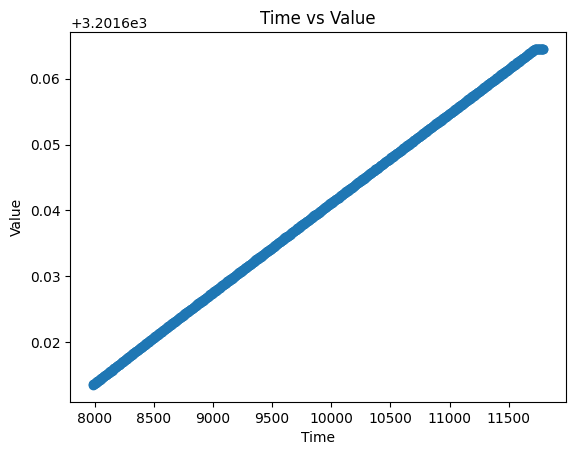

In [80]:
import matplotlib.pyplot as plt

times = [float(entry['time'][0]) for entry in offsets['offset']]
values = [float(entry['value'][0]) for entry in offsets['offset']]

plt.plot(times, values, marker='o')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time vs Value')
plt.show()

In [5]:
triggersTimestamps = data[0][1]['time_stamps']
triggers = data[0][1]['time_series']
len(triggersTimestamps), len(triggers)

(5322, 5322)

In [6]:
audio = data[0][3]['time_series']
audioTimestamps = data[0][3]['time_stamps']
eegData = data[0][2]['time_series']
eegTimestamps = data[0][2]['time_stamps']
audio.shape, audioTimestamps.shape, eegData.shape

((183075840, 1), (183075840,), (3814127, 64))

In [7]:
triggers = np.array(triggers)
audio = audio.reshape(-1)
triggers = triggers.reshape(-1)
triggers.shape, audio.shape

((5322,), (183075840,))

In [8]:
def getActivity(activity):
    if 'Fixation' in activity:
        return 'Fixation'
    elif 'ITI' in activity:
        return 'ITI'
    elif 'ISI' in activity:
        return 'ISI'
    elif 'Speech' in activity:
        return 'Speech'
    elif 'Stimulus' in activity:
        return 'Stimulus'
    else:
        return 'None'

In [9]:
triggers[:20]

array(['SilentSyllablesPracticeStartFixation:Text_silence',
       'SilentSyllablesPracticeEndFixation:Text_silence',
       'SilentSyllablesPracticeStartStimulus:Text_silence',
       'SilentSyllablesPracticeEndStimulus:Text_silence',
       'SilentSyllablesPracticeStartISI:Text_silence',
       'SilentSyllablesPracticeEndISI:Text_silence',
       'SilentSyllablesPracticeStartSpeech:Text_silence',
       'SilentSyllablesPracticeEndSpeech:Text_silence',
       'SilentSyllablesPracticeStartITI:Text_silence',
       'SilentSyllablesPracticeEndITI:Text_silence',
       'SilentSyllablesPracticeStartFixation:Audio_CLO',
       'SilentSyllablesPracticeEndFixation:Audio_CLO',
       'SilentSyllablesPracticeStartStimulus:Audio_CLO',
       'SilentSyllablesPracticeEndStimulus:Audio_CLO',
       'SilentSyllablesPracticeStartISI:Audio_CLO',
       'SilentSyllablesPracticeEndISI:Audio_CLO',
       'SilentSyllablesPracticeStartSpeech:Audio_CLO',
       'SilentSyllablesPracticeEndSpeech:Audio_CLO',


In [10]:

def findClosestIndex(timepoints, target):
   
    timepoints = np.asarray(timepoints)  # Ensure the input is a NumPy array
    idx = np.searchsorted(timepoints, target, side="left")
    if idx == 0:
        return 0
    if idx == len(timepoints):
        return len(timepoints) - 1
    
    before = idx - 1
    after = idx
    
    if after < len(timepoints) and abs(timepoints[after] - target) < abs(timepoints[before] - target):
        return after, timepoints[before]
    else:
        return before, timepoints[after]


In [11]:
activity = None
task = None
word = None
mappings = []
for index in range(0, triggers.shape[0], 2):
    activity, action = triggers[index].split(':')
    task, word = action.split('_')
    activity = getActivity(activity)
    markerStartTime = triggersTimestamps[index]
    markerEndTime = triggersTimestamps[index+1]
    audioStartIndex, audioStartTime = findClosestIndex(audioTimestamps, markerStartTime)
    audioEndIndex, audioEndTime = findClosestIndex(audioTimestamps, markerEndTime)
    eegStartIndex, eegStartTime = findClosestIndex(eegTimestamps, markerStartTime)
    eegEndIndex, eegEndTime = findClosestIndex(eegTimestamps, markerEndTime)
    mappings.append([activity, task, word,
                    markerStartTime, markerEndTime,
                    eegStartTime, eegEndTime, eegStartIndex, eegEndIndex,
                    audioStartTime, audioEndTime, audioStartIndex, audioEndIndex     
                ])
 


In [14]:
eegSamplingFrequency = data[0][2]['info']['nominal_srate'][0]
audioSamplingFrequency = data[0][3]['info']['nominal_srate'][0]
audioSamplingFrequency

'48000.00000000000'

In [15]:
import os
from pathlib import Path
dataDir = Path(os.getcwd(), 'PilotData')

os.makedirs(dataDir, exist_ok=True)

In [16]:
import json
from scipy.io.wavfile import write

In [17]:
for index in range(len(mappings)):
    activity, task, word,
    activity, task, word, markerStartTime, markerEndTime, eegStartTime, eegEndTime, eegStartIndex, eegEndIndex, audioStartTime, audioEndTime, audioStartIndex, audioEndIndex = mappings[index] 
    filename = f'{activity}_{task}_{word}_{index}'
    audioFilenamPath = Path(dataDir, f'{filename}.wav')
    eegDataFilenamePath = Path(dataDir,f'{filename}.npy')
    jsonFilenamePath = Path(dataDir, f'{filename}.json')

    eegSample = eegData[eegStartIndex:eegEndIndex, ]
    audioSample =audio[audioStartIndex:audioEndIndex]
    
    jsonMetaData = {}
    jsonMetaData['Activity'] = activity
    jsonMetaData['task'] = task
    jsonMetaData['word'] = word
    jsonMetaData['MarkerStartTime'] = markerStartTime
    jsonMetaData['MarkerEndTime'] = markerEndTime
    jsonMetaData['EegStartTime'] = eegStartTime
    jsonMetaData['EegEndTime'] = eegEndTime
    jsonMetaData['EegStartIndex'] = str(eegStartIndex)
    jsonMetaData['EegEndIndex'] = str(eegEndIndex)
    jsonMetaData['audioStartTime'] = audioStartTime
    jsonMetaData['audioEndTime'] = audioEndTime
    jsonMetaData['audioStartIndex'] = str(audioStartIndex)
    jsonMetaData['audioEndIndex'] = str(audioEndIndex)
    jsonMetaData['EEGSamplingFrequency'] = eegSamplingFrequency
    jsonMetaData['AudioSamplingFrequency'] = audioSamplingFrequency

    with open(jsonFilenamePath, 'w') as jsonFile:
        json.dump(jsonMetaData, jsonFile, indent=4)
    np.save(eegDataFilenamePath, eegSample)
    write(audioFilenamPath, 48000, audioSample)
    
    

In [18]:
write('audio.wav', 48000, audio)